In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Task 1 Download the dataset

### Task 2:  Load the dataset into the tool.

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Task 3: Perform Below Visualizations.
● Univariate Analysis

● Bi- Variate Analysis

● Multi-Variate Analysis

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='culmen_length_mm', ylabel='Density'>

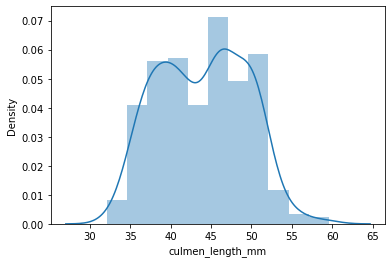

In [4]:
# Univariate analysis on culmen_length_mm
sns.distplot(df['culmen_length_mm'])

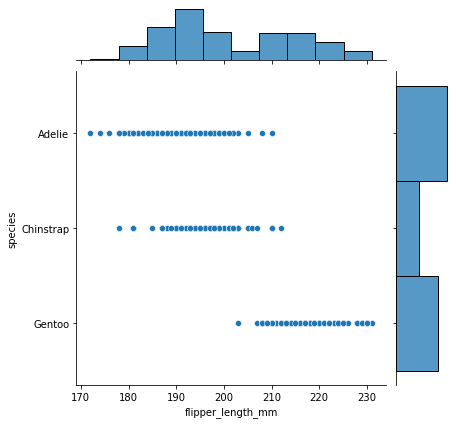

In [6]:
# bi-variate analysis between species and flipper_length_mm

sns.jointplot(x = 'flipper_length_mm', y = 'species', data=df)

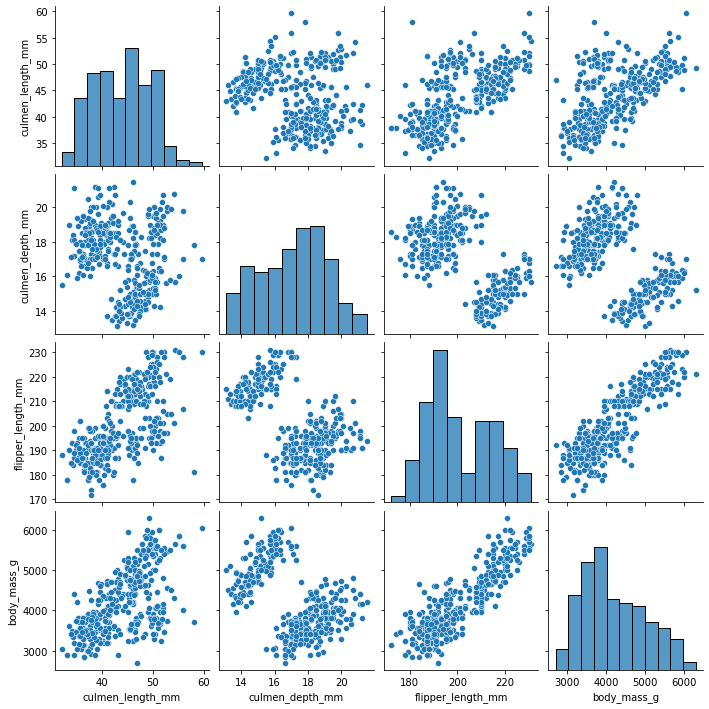

In [7]:
# multi-variate analysis

sns.pairplot(df)

### Task 4: Perform descriptive statistics on the dataset.

In [8]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Task 5:  Check for Missing values and deal with them.

In [9]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [10]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [16]:
numeric_columns = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='median')

In [18]:
df[numeric_columns]=imputer.fit_transform(df[numeric_columns])

In [20]:
categorical_column = df['sex'].values.reshape(-1,1)

In [21]:
categorical_column.shape

(344, 1)

In [23]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
df['sex'] = imputer.fit_transform(categorical_column)

In [24]:
df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Task 8: Check for Categorical columns and perform encoding.

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
df.sex = le.fit_transform(df.sex)

In [37]:
df.island = le.fit_transform(df.island)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    int32  
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int32  
dtypes: float64(4), int32(2), object(1)
memory usage: 16.2+ KB


In [39]:
numeric_columns = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex','island']

### Task 6: Find the outliers and replace them outliers

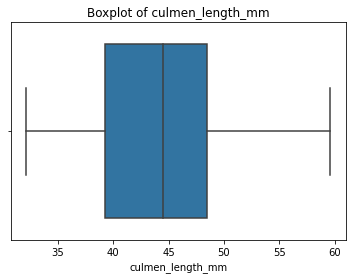

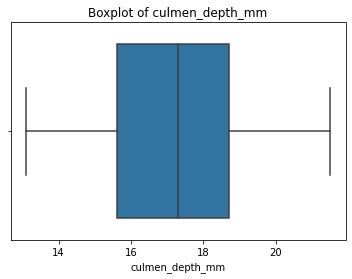

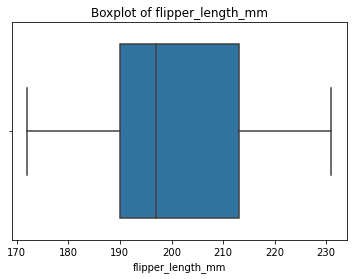

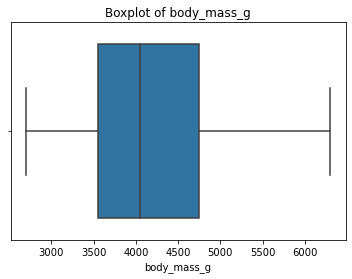

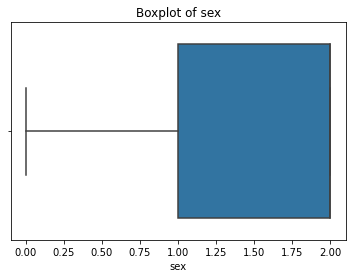

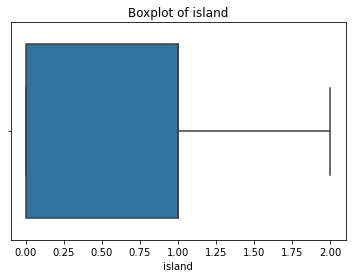

In [40]:
for i in numeric_columns:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

### Task 7: Check the correlation of independent variables with the target

In [44]:
corr_btw_dependent_and_independent = df.groupby(['species'])[numeric_columns].mean()
corr_btw_dependent_and_independent

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island
species,,,,,,
Adelie,38.828618,18.339474,190.000000,3702.960526,1.519737,1.052632
Chinstrap,48.833824,18.420588,195.823529,3733.088235,1.500000,1.000000
Gentoo,47.480242,15.000806,217.024194,5067.741935,1.516129,0.000000


### Task 9: Split the data into dependent and independent variables.

In [49]:
x = df.drop(columns = ['species'], axis=1)
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,corr_btw_dependent_and_independent
0,2,39.10,18.7,181.0,3750.0,2,NaN
1,2,39.50,17.4,186.0,3800.0,1,NaN
2,2,40.30,18.0,195.0,3250.0,1,NaN
3,2,44.45,17.3,197.0,4050.0,2,NaN
4,2,36.70,19.3,193.0,3450.0,1,NaN


In [50]:
y = df['species']
y.head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

### Task 10: Scaling the data

In [51]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [52]:
X_scaled = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
X_scaled.head()

C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,corr_btw_dependent_and_independent
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0,NaN
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5,NaN
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5,NaN
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0,NaN
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5,NaN


### Task 11: Split the data into training and testing

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

### Task 12: check the training and testing data shape.

In [55]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((275, 7), (69, 7), (275,), (69,))